##  ML_Zoomcamp Homework4 : Evaluation Metrics for Classification

### Dataset : Credit Card Data from book "Econometric Analysis"

### Homework link : https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/04-evaluation/homework.md

## Data Preparation

### Import Packages 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Import & read dataset 

In [2]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv


Saved under AER_credit_card_data.csv


In [3]:
df = pd.read_csv('AER_credit_card_data.csv')

In [4]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


## EDA

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 123.8+ KB


In [6]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [7]:
df.nunique()

card              2
reports          13
age             418
income          431
share          1162
expenditure     981
owner             2
selfemp           2
dependents        7
months          193
majorcards        2
active           35
dtype: int64

###  The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card)

####  Create the target variable by mapping yes to 1 and no to 0.

In [8]:
# Using map function
df.card = df.card.map({'yes': 1, 'no': 0})

In [9]:
df.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,1,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,1,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,1,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,1,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,1,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 123.8+ KB


### Split the data (Using Scikit-Learn)

In [11]:
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [12]:
#training sets : 60% distrubution  
#validation sets : 20% distribution
#test sets : 20% distribution

target = df.card
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

df_full_train = df_train.reset_index(drop = True)
df_train = df_train.reset_index(drop = True)
df_val = df_train.reset_index(drop = True)
df_test = df_train.reset_index(drop = True)

In [13]:
y_train = df_train.card.values
y_val = df_val.card.values

del df_train['card']
del df_val['card']

### Question 1 : numerical variable with the highest AUC

In [14]:
numerical_col = ['reports','age','income','share','expenditure','dependents','months','majorcards','active']
numerical_col

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [15]:
categorical_col = ['owner','selfemp']
categorical_col

['owner', 'selfemp']

#### Calculate accurancy 

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve


In [17]:
accs = {}
for nc in numerical_col : 
    auc = roc_auc_score(y_train, df_train[nc])
    if auc< 0.5:
        auc = roc_auc_score(y_train, -df_train[nc])
    accs[nc] = auc
    print(nc, "    \t", auc)
max(accs)

reports     	 0.7380572854883353
age     	 0.5394301107156979
income     	 0.5611901937524714
share     	 0.9891261368129697
expenditure     	 0.9902135231316727
dependents     	 0.500067961644919
months     	 0.5478141063661527
majorcards     	 0.5301502570185844
active     	 0.5705194741004349


'share'

####  The  variable with the highest correlation is 'share'

### Training the model

In [18]:
from sklearn.feature_extraction import DictVectorizer

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
dv = DictVectorizer(sparse=False)
train_dict = df_train[ categorical_col  + numerical_col].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)
val_dict = df_train[ categorical_col  + numerical_col].to_dict(orient='records')
X_val = dv.transform(val_dict)


In [21]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [22]:
y_pred = model.predict_proba(X_val)[:,1]

###  Question 2 :What's the AUC of this model on the validation dataset? (round to 3 digits)

In [23]:
auc = roc_auc_score(y_val,y_pred)
round(auc,3)

0.998

### Question 3 : precision and recall 

#### Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01

In [24]:
scores = []
precision = {}
recall = {}
thresholds = np.linspace(0, 1, 101)
for t in thresholds: 
    tp = ((y_pred >= t) & (y_val == 1)).sum()
    fp = ((y_pred >= t) & (y_val == 0)).sum()
    fn = ((y_pred < t) & (y_val == 1)).sum()
    tn = ((y_pred < t) & (y_val == 0)).sum()
    
    precision[t] = tp / (tp + fp)
    recall[t] = tp / (tp + fn)
    
    scores.append((t, tp, fp, fn, tn, precision[t], recall[t]))
    
   
df_scores = pd.DataFrame(scores)
df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn','precision','recall']

In [25]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,562,144,0,0,0.796034,1.000000
1,0.01,562,92,0,52,0.859327,1.000000
2,0.02,562,80,0,64,0.875389,1.000000
3,0.03,562,65,0,79,0.896332,1.000000
4,0.04,562,65,0,79,0.896332,1.000000
...,...,...,...,...,...,...,...
96,0.96,548,0,14,144,1.000000,0.975089
97,0.97,548,0,14,144,1.000000,0.975089
98,0.98,548,0,14,144,1.000000,0.975089
99,0.99,545,0,17,144,1.000000,0.969751


###  Plot recall & precision 

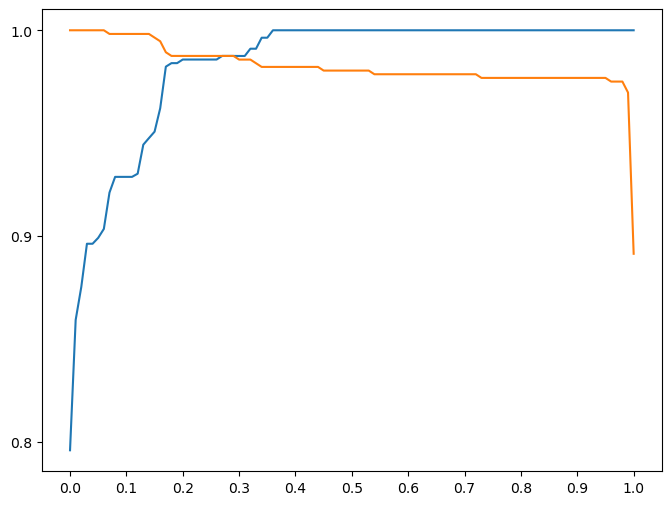

In [26]:
fig, ax = plt.subplots(figsize=(8, 6))

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.plot(df_scores.threshold, df_scores.precision)
plt.plot(df_scores.threshold, df_scores.recall)
plt.show()

In [27]:
df_scores[df_scores.precision == df_scores.recall]

,threshold,tp,fp,fn,tn,precision,recall
27,0.27,555,7,7,137,0.987544,0.987544
28,0.28,555,7,7,137,0.987544,0.987544
29,0.29,555,7,7,137,0.987544,0.987544


#### threshold precision and recall curves intersect almost at 0.3 

### Quetion 4 : Calculating F1 score metrics

In [28]:
df_scores['F1_score'] = 2 *  (df_scores.precision) *  (df_scores.recall) / ( (df_scores.precision) +  (df_scores.recall) )

In [29]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall,F1_score
0,0.00,562,144,0,0,0.796034,1.000000,0.886435
1,0.01,562,92,0,52,0.859327,1.000000,0.924342
2,0.02,562,80,0,64,0.875389,1.000000,0.933555
3,0.03,562,65,0,79,0.896332,1.000000,0.945332
4,0.04,562,65,0,79,0.896332,1.000000,0.945332
...,...,...,...,...,...,...,...,...
96,0.96,548,0,14,144,1.000000,0.975089,0.987387
97,0.97,548,0,14,144,1.000000,0.975089,0.987387
98,0.98,548,0,14,144,1.000000,0.975089,0.987387
99,0.99,545,0,17,144,1.000000,0.969751,0.984643


In [30]:
max_F1 = max(df_scores.F1_score)
print(max_F1)
df_scores[df_scores.F1_score == max_F1].iloc[:]

0.9910233393177738


,threshold,tp,fp,fn,tn,precision,recall,F1_score
36,0.36,552,0,10,144,1.0,0.982206,0.991023
37,0.37,552,0,10,144,1.0,0.982206,0.991023
38,0.38,552,0,10,144,1.0,0.982206,0.991023
39,0.39,552,0,10,144,1.0,0.982206,0.991023
40,0.40,552,0,10,144,1.0,0.982206,0.991023
41,0.41,552,0,10,144,1.0,0.982206,0.991023
42,0.42,552,0,10,144,1.0,0.982206,0.991023
43,0.43,552,0,10,144,1.0,0.982206,0.991023
44,0.44,552,0,10,144,1.0,0.982206,0.991023


####  threshold of F1 is maximal when  threshold between 0.36 and 0.44 , we take    threshold = 0.4 

### Question 5 : K-fold cross-validation (How large is standard devidation of the AUC scores across different folds?)

In [37]:
def train(df, y):
    cat = df[categorical_col + numerical_col].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear')
    model.fit(X, y)

    return dv, model


def predict(df, dv, model):
    cat = df[categorical_col + numerical_col].to_dict(orient='records')
    
    X = dv.transform(cat)

    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [38]:
from sklearn.model_selection import KFold

In [39]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

#### Use AUC to evaluate the model on validation

In [40]:
aucs = []

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    y_train = df_train.card.values

    df_val = df_train_full.iloc[val_idx]
    y_val = df_val.card.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    rocauc = roc_auc_score(y_val, y_pred)
    aucs.append(rocauc)

In [41]:
np.array(aucs).round(3)

array([0.994, 0.994, 0.988, 1.   , 0.995, 0.996, 0.998, 1.   , 1.   ,
       1.   ])

In [42]:
print('auc = %0.3f ± %0.3f' % (np.mean(aucs), np.std(aucs)))

auc = 0.997 ± 0.004


### Question 6 

In [43]:
def train(df, y, C = 1):
    cat = df[categorical_col + numerical_col].to_dict(orient='records')
    
    dv = DictVectorizer(sparse=False)
    dv.fit(cat)

    X = dv.transform(cat)

    model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
    model.fit(X, y)

    return dv, model

In [44]:
nfolds = 5
kfold = KFold(n_splits=nfolds, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    aucs = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)
        
        auc = roc_auc_score(y_val, y_pred)
        aucs.append(auc)

    print('C=%s, auc = %0.3f ± %0.3f' % (C, np.mean(aucs), np.std(aucs)))

C=0.01, auc = 0.992 ± 0.006
C=0.1, auc = 0.995 ± 0.004
C=1, auc = 0.996 ± 0.003
C=10, auc = 0.996 ± 0.003


##### C = 1 - mean auc = 0.996 +- 0.003 is the best mean score